## Information Visualization - Project 1

*Date: 2022/9/13*

### Team Members

+ Wenbo Liu, wbliu20@lzu.edu.cn, 320200931121
+ Chengkai Lin, linchk20@lzu.edu.cn, 320200945841
+ Yifei Guo, guoyf20@lzu.edu.cn, 320200930901
+ Xuda Han, hanxd20@lzu.edu.cn, 320200945781

---

### Prerequisites

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'ticks', font_scale = 0.6)

### Requirement 1
Perform an exploratory analysis of the dataset. Remember that exploratory analyses do not need to be refined or clear. It is just a draft of several visualizations that help get familiar with the data.  
  
Hence, in this step you should have several visualizations that help getting an idea of the datasets and will serve as a starting point to the explanatory visualizations in this project. (Don’t forget the difference between exploratory and explanatory).  
  
Hint: Python notebooks are usually useful for exploratory analyses because you can combine python code, visualizations and markdown text. Use all of these elements.

#### 1.1 Data Structure
We first read the specific columns (*algorithm*, *no_datapoints*, *no_features*, *train_energy(J)*) in the dataset to check the data structure.

In [3]:
df = pd.read_csv('results-2021-12-18.csv',usecols=['algorithm','no_datapoints','no_features','train_energy(J)'])
df

,algorithm,no_datapoints,no_features,train_energy(J)
0,AdaBoost,2730,8169,1.037993
1,Decision Tree,3900,2451,0.068482
2,SVM,3900,4084,0.530155
3,AdaBoost,3900,1633,0.243067
4,Bagging Classifier,3900,6535,0.699298
...,...,...,...,...
3595,Random Forest,3900,4901,1.501089
3596,Bagging Classifier,1559,8169,0.170978
3597,SVM,3900,5718,1.108957
3598,Random Forest,1559,8169,0.581876


It is hard to get any useful information from the table above, so we categorized it by algorithm and these are our discoveries:
+ All algorithms have the same group of values for *no_datapoints* and *no_features*.
+ *train_energy(J)* in different entries differs when *no_datapoints* or *no_features*  have the same value.

In [4]:
algorithm = df.groupby('algorithm')
for name, rows in algorithm:
    print(rows)

     algorithm  no_datapoints  no_features  train_energy(J)
0     AdaBoost           2730         8169         1.037993
3     AdaBoost           3900         1633         0.243067
7     AdaBoost           3119         8169         0.581184
8     AdaBoost           3900         3268         0.407974
25    AdaBoost           1169         8169         0.250212
...        ...            ...          ...              ...
3556  AdaBoost           3900          817         0.292578
3558  AdaBoost           2340         8169         0.427181
3560  AdaBoost           3900          817         0.266558
3588  AdaBoost           1169         8169         0.155544
3599  AdaBoost           3900         8169         0.992407

[600 rows x 4 columns]
               algorithm  no_datapoints  no_features  train_energy(J)
4     Bagging Classifier           3900         6535         0.699298
9     Bagging Classifier            779         8169         0.092099
23    Bagging Classifier           3900       

#### 1.2 Pair Plot
According to the pair plot, there is no apparent relationship between *no_datapoints* and *no_features*, but they each are related to *train_energy(J)*.

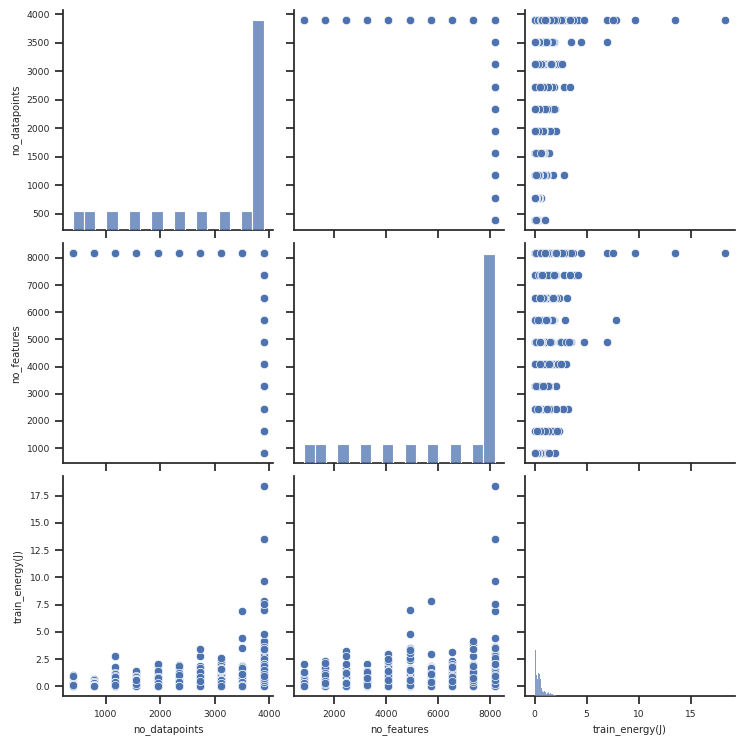

In [5]:
sns.pairplot(df)

#### 1.3 Bifactor Analysis
We draw a graph representing how *no_datapoints* and *no_features* affect *train_energy(J)*. In order to find relationship more conveniently, we categorized the data by *algorithm*, *no_datapoints* and *no_features* and calculated the average value of *train_energy(J)*.  
  
It seems from the graph that *train_energy(J)* increases as *no_datapoints* gets larger, but there is no clear linear relationship between *no_features* and *train_energy(J)*

In [26]:
def bifactor(dataframe: pd.DataFrame, columns):
    grouped = dataframe.groupby(columns[-2: : -1])  # 对 'algorithm','no_datapoints'和'no_features'进行聚类操作
    mean = grouped.mean()  # 对'train_energy(J)'求均值
    mean.reset_index(inplace = True)  # 重设索引，不再使用上述三列作为索引
    data = mean.groupby(columns[0])  # 按照算法进行聚类
    fig,counter = plt.figure(figsize = (9, 6)), 1  # 生成画布
    for key, value in data:
        axes = fig.add_subplot(2, 3, counter)  # 添加子图
        axes.set_title(key)  # 设置标题
        sns.scatterplot(data = value, x = columns[1], y = columns[2], hue = columns[3], ax = axes)  # 生成散点图
        if counter != 1:
            axes.set_ylabel('')
        else:
            axes.set_ylabel('no_features', rotation = 'horizontal', labelpad = 45, loc = 'bottom')
        if counter != 4:
            axes.set_xlabel('')
        sns.despine(top = True, right = True)  # 去掉上框线及右框线
        counter += 1
    plt.tight_layout()
    plt.show()

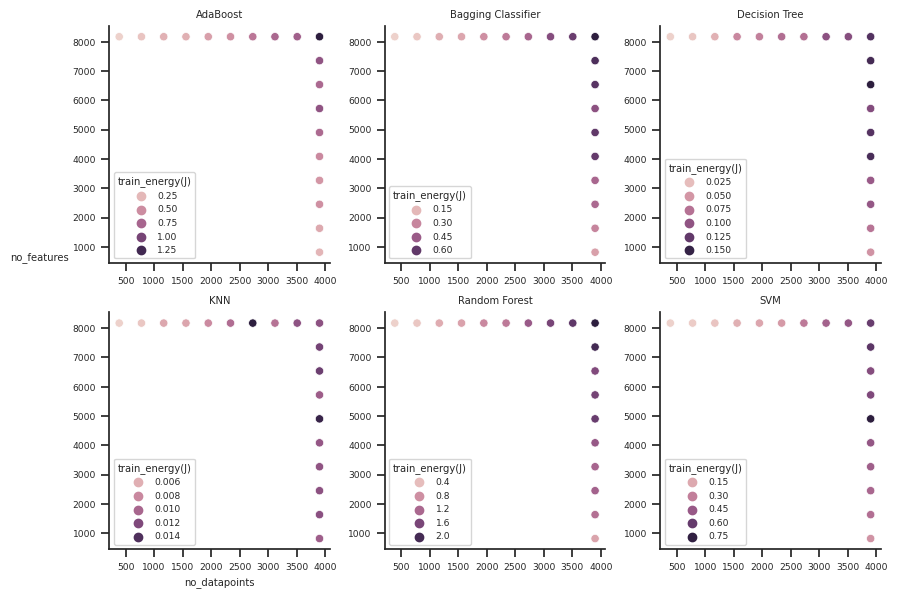

In [27]:
bifactor(df,['algorithm','no_datapoints','no_features','train_energy(J)'])

#### 1.4 Single-Factor Analysis

From the analyses and conclusions above, we chose an algorithm that appears to be of most relevance, **Random Forest**, to take deeper insights into the relationships between these variables.  
  
We fit a regression curve of **Random Forest** using its scatter plot and found that *train_energy(J)* has a significant increase as *no_datapoints* gets larger, while there 

我们用'Random Forest'的散点图拟合了它的回归曲线。我们发现，随着'no_datapoints'的增多，'train_energy(J)'有着明显的增长，而'no_features'和'train_energy(J)'之间则无法看出这种趋势（因为曲线过于平缓）。

In [38]:
def sgfactor(dataframe: pd.DataFrame, columns, alg):
    target = dataframe[dataframe[columns[0]] == alg]
    column1 = target.loc[: , [columns[1], columns[3]]]
    column2 = target.loc[:, [columns[2], columns[3]]]
    fig,counter = plt.figure(figsize = (6, 3)), 1
    for item in [[column1, columns[1], columns[3]], [column2, columns[2], columns[3]]]:
        axes = fig.add_subplot(1, 2, counter)
        sns.regplot(data = item[0],x = item[1],y = item[2]) 
        if counter == 1:
            axes.set_ylabel('train_energy(J)', rotation = 'horizontal', labelpad = 25)
        else:
            axes.set_ylabel('')
        sns.despine(top = True, right = True)
        counter += 1
    fig.suptitle(alg)
    plt.tight_layout()
    plt.show()

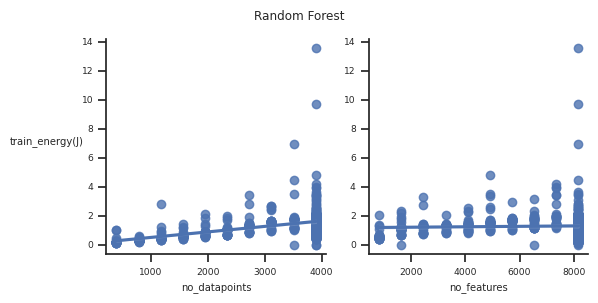

In [39]:
sgfactor(df, ['algorithm', 'no_datapoints', 'no_features', 'train_energy(J)'], 'Random Forest')

结合上面的分析，我们认为'no_features'和'train_energy(J)'之间存在着某种二次型的线性关系。

### Requirement 2
<small>Create a visualization that shows, for the algorithm SVM, how no_features affects energy consumption (train_energy(J)). This visualization should 
<ol>
<li> Choose the most suitable chart type,</li>
<li> Follow the visualization guidelines taught in the class,</li>
<li> Be as simple as possible. If necessary, there should be a visual element highlighting how no_features correlates with train_energy(J).</li>
</ol>
Note that each experiment is repeated 30 times (as denoted by the feature iteration). You may want to use the average of these 30-sized samples and maybe its standard deviation.</small>

In [48]:
def feature_energy(dataframe: pd.DataFrame, extCol: list, indCol, depCol):
    target = dataframe[dataframe[extCol[0]] == extCol[1]]
    rel = sns.relplot(data = target, x = indCol, y = depCol, kind = 'line', errorbar = 'sd')
    rel.fig.suptitle(extCol[1])
    sns.scatterplot(data = target, x = indCol, y = depCol, color = 'lightgray')
    sns.despine(top = True, right = True)
    plt.ylabel(depCol, rotation = "horizontal", labelpad = 25)
    plt.ylim(0, 2.3)
    plt.show()

通过均值曲线我们可以看出，随着no_features的增多，train_energy(J)的值先增大后减小。这证实了我们的猜想。

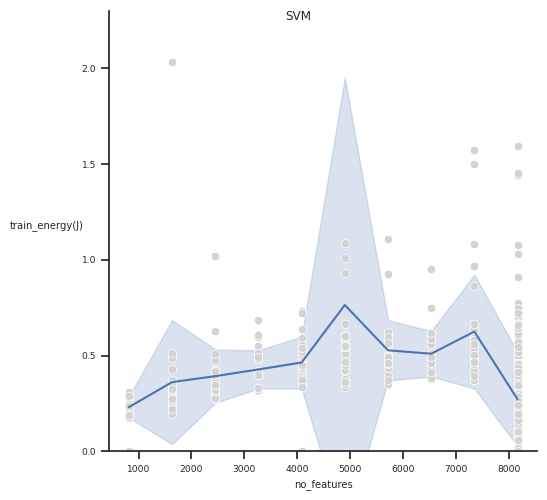

In [49]:
feature_energy(df, ['algorithm', 'SVM'], 'no_features', 'train_energy(J)')

### Requirement 3
<small>As you can imagine, creating a simple visualization to show all results is far from trivial. There are 3 main variables that are compared against train_energy(J): no_datapoints, no_features, and algorithm. Create a visualization using small multiples that shows, for each machine learning algorithm, how no_datapoints and no_features affect energy consumption (train_energy(J)).</small>

In [42]:
def small_multiples(dataframe: pd.DataFrame, groupedby, indVars: list, depVar):
    def plot(data, name, cols):
        axes = fig.add_subplot(height, width, num)
        sns.regplot(x = cols[0], y = cols[1], data = value[cols], order = 2,
        scatter_kws = {'color': 'darkturquoise', 'alpha': 0.3}, line_kws = {'color': 'navy'})
        sns.despine(top = True, right = True)
        axes.set_xlabel('')
        if num <= width: # Is it the first row?
            axes.set_title(name)
        if num % width == 1: # Is it the first column?
            axes.set_ylabel(cols[1], rotation = 'horizontal', labelpad = 55, weight = 'bold', size = 10)
            axes.set_xlabel(cols[0])
        else:
            axes.set_ylabel('')
            
    grouped = dataframe.groupby(groupedby)
    width = len(grouped)
    height = len(indVars)
    fig, num = plt.figure(figsize = (18, 6)), 0

    for i in indVars:
        for key, value in grouped:
            num += 1
            plot(value, key, [i, depVar])

    plt.tight_layout()
    plt.show()

我们为每个算法的每个变量做了散点图并生成了回归曲线。为了直观的显示'no_features'和'train_energy(J)'之间的关系，我们使用了二次的多项式函数对曲线进行拟合。从图中我们可以清晰的看出规律：随着datapoints的增多，train_energy也逐渐增多，随着features的增多，train_energy先增多后减少。

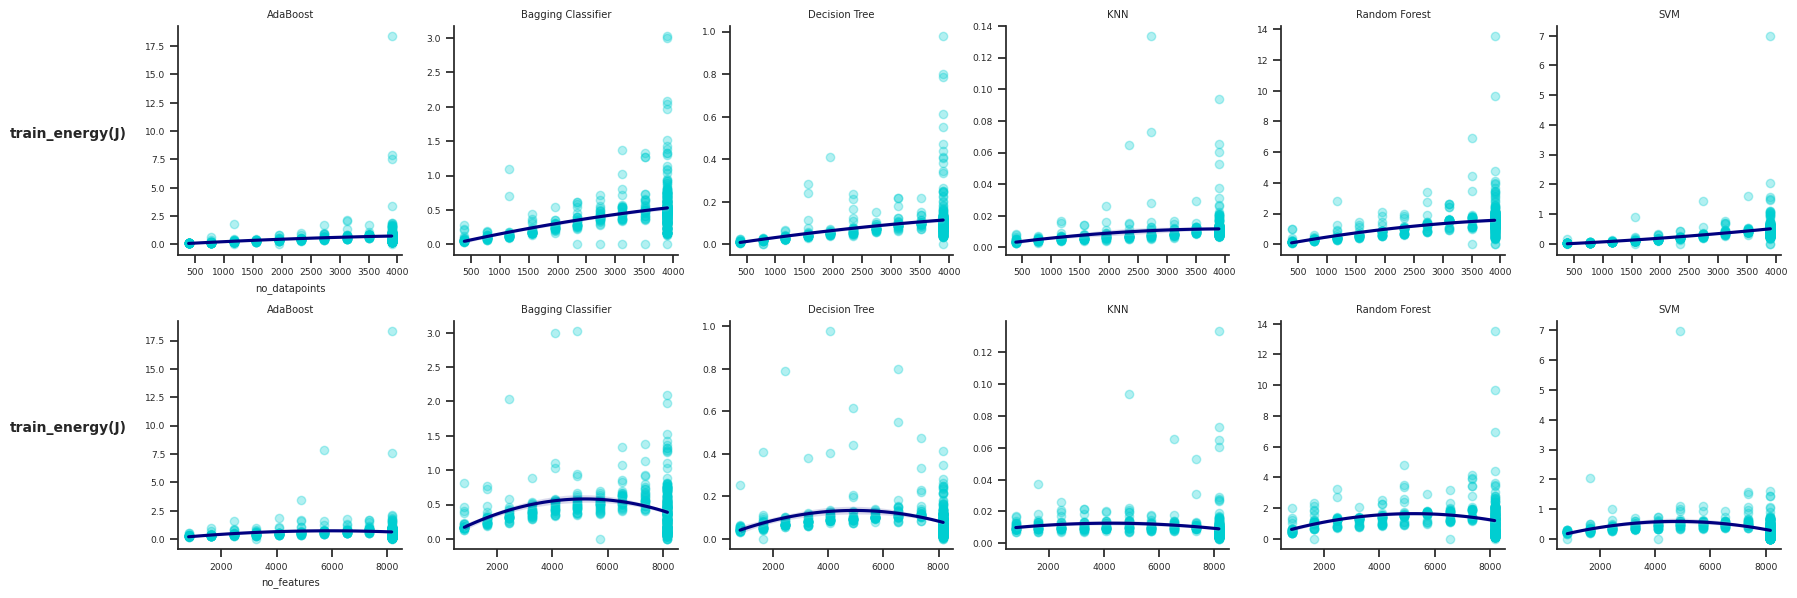

In [43]:
small_multiples(df, 'algorithm', ['no_datapoints', 'no_features'], 'train_energy(J)')

### Requirement 4
<small>Create a single plot that is able to capture most of the insights of the visualization in requirement 3. You wont be able to capture all the insights, but the idea is the capture as much as possible while keeping the visualization simple and interesting.</small>

In [14]:
def insight(df):
    results = []
    for key, value in df.groupby("algorithm"):
        value = value.iloc[: , 1: ]
        value = (value - value.min()) / (value.max() - value.min())
        results.append(value)
    norm = pd.concat(results)
    fig, ax = plt.subplots()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xticks((), ())
    ax.set_yticks((), ())
    ax.set_xlabel("no_datapoints\nno_features")
    # plt.plot(norm[["no_datapoints", "train_energy(J)"]].set_index("no_datapoints").sort_values(by = "no_datapoints"))
    plt.plot(norm[["no_datapoints", "train_energy(J)"]].groupby("no_datapoints").agg("mean"), lw = 4)
    plt.plot(norm[["no_features", "train_energy(J)"]].groupby("no_features").agg("mean"), lw = 4)
    # return norm[["no_features", "train_energy(J)"]].set_index("no_features").groupby("no_features").agg("max")
    # sns.relplot(data = norm, x = "no_datapoints", y = "train_energy(J)", kind = "line", errorbar = "sd")
    # sns.relplot(data = norm, x = "no_features", y = "train_energy(J)", kind = "line", errorbar = "sd")

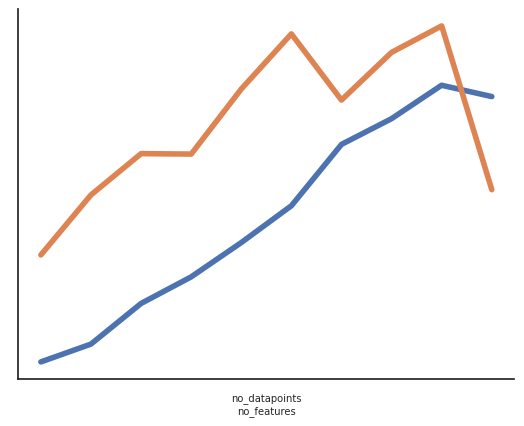

In [15]:
insight(df)

### Requirement 5
<small>Create a visualization that shows an interesting insight in the data that was not unveiled by the visualizations of requirements 2, 3, and 4.</small>

按算法的种类对能量进行求和，利用面积表示能量的大小，得到消耗能量最多的算法